<a href="https://colab.research.google.com/github/IshwaryaKeerthivasan/Sentiment-Analysis/blob/main/Sentiment_and_Emotion_Analysis_for_News_Articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests

# Replace 'YOUR_API_KEY' with your actual News API key
API_KEY = '6566a29f03524e34a91aa4f6aa6859b9'

def fetch_news_data(endpoint, params):
    url = f'https://newsapi.org/v2/{endpoint}'
    params['apiKey'] = API_KEY
    response = requests.get(url, params=params)
    data = response.json()
    return data

# Example usage to fetch top headlines
top_headlines_params = {
    'country': 'us',
}
top_headlines_data = fetch_news_data('top-headlines', top_headlines_params)

# Example usage to fetch everything
everything_params = {
    'q': 'technology',
    'language': 'en',
}
everything_data = fetch_news_data('everything', everything_params)

# Example usage to fetch sources
sources_data = fetch_news_data('top-headlines/sources', {})

In [ ]:
sources_data

{'status': 'ok',
 'sources': [{'id': 'abc-news',
   'name': 'ABC News',
   'description': 'Your trusted source for breaking news, analysis, exclusive interviews, headlines, and videos at ABCNews.com.',
   'url': 'https://abcnews.go.com',
   'category': 'general',
   'language': 'en',
   'country': 'us'},
  {'id': 'abc-news-au',
   'name': 'ABC News (AU)',
   'description': "Australia's most trusted source of local, national and world news. Comprehensive, independent, in-depth analysis, the latest business, sport, weather and more.",
   'url': 'https://www.abc.net.au/news',
   'category': 'general',
   'language': 'en',
   'country': 'au'},
  {'id': 'aftenposten',
   'name': 'Aftenposten',
   'description': 'Norges ledende nettavis med alltid oppdaterte nyheter innenfor innenriks, utenriks, sport og kultur.',
   'url': 'https://www.aftenposten.no',
   'category': 'general',
   'language': 'no',
   'country': 'no'},
  {'id': 'al-jazeera-english',
   'name': 'Al Jazeera English',
   'desc

In [ ]:
import pandas as pd

# Assuming 'top_headlines_data' contains the fetched news data
# Assuming 'everything_data' contains the fetched news data
# Assuming 'sources_data' contains the fetched news data

# Function to convert data into DataFrame
def convert_to_dataframe(news_data):
    # Initialize empty lists to store data
    ids = []
    names = []
    descriptions = []
    urls = []
    categories = []
    languages = []
    countries = []

    # Loop through each news item and extract relevant information
    for item in news_data:
        ids.append(item.get('id', 'N/A'))
        names.append(item.get('name', 'N/A'))
        descriptions.append(item.get('description', 'N/A'))
        urls.append(item.get('url', 'N/A'))
        categories.append(item.get('category', 'N/A'))
        languages.append(item.get('language', 'N/A'))
        countries.append(item.get('country', 'N/A'))

    # Create a DataFrame using the extracted information
    df = pd.DataFrame({
        'ID': ids,
        'Name': names,
        'Description': descriptions,
        'URL': urls,
        'Category': categories,
        'Language': languages,
        'Country': countries
    })

    return df

# Convert fetched news data to DataFrames
top_headlines_df = convert_to_dataframe(top_headlines_data['articles'])
everything_df = convert_to_dataframe(everything_data['articles'])
sources_df = convert_to_dataframe(sources_data['sources'])

print("\nSources DataFrame:")
sources_df.head()


Sources DataFrame:


,ID,Name,Description,URL,Category,Language,Country
0,abc-news,ABC News,"Your trusted source for breaking news, analysi...",https://abcnews.go.com,general,en,us
1,abc-news-au,ABC News (AU),"Australia's most trusted source of local, nati...",https://www.abc.net.au/news,general,en,au
2,aftenposten,Aftenposten,Norges ledende nettavis med alltid oppdaterte ...,https://www.aftenposten.no,general,no,no
3,al-jazeera-english,Al Jazeera English,"News, analysis from the Middle East and worldw...",https://www.aljazeera.com,general,en,us
4,ansa,ANSA.it,"Agenzia ANSA: ultime notizie, foto, video e ap...",https://www.ansa.it,general,it,it


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Download NLTK resources (only need to run once)
nltk.download('punkt')
nltk.download('stopwords')

# Initialize stemmer and stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

import re

def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Removing stopwords
    tokens = [token for token in tokens if token not in stop_words]

    # Stemming
    tokens = [stemmer.stem(token) for token in tokens]

    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Apply preprocessing to the 'Description' column in sources_df
sources_df['Preprocessed_Description'] = sources_df['Description'].apply(preprocess_text)

# Display the preprocessed DataFrame
print(sources_df[['Description', 'Preprocessed_Description']])

                                           Description  \
0    Your trusted source for breaking news, analysi...   
1    Australia's most trusted source of local, nati...   
2    Norges ledende nettavis med alltid oppdaterte ...   
3    News, analysis from the Middle East and worldw...   
4    Agenzia ANSA: ultime notizie, foto, video e ap...   
..                                                 ...   
123  Wired is a monthly American magazine, publishe...   
124  Wired reports on how emerging technologies aff...   
125  Das Online-Portal des führenden Wirtschaftsmag...   
126  中国主要重点新闻网站,依托新华社遍布全球的采编网络,记者遍布世界100多个国家和地区,地方频...   
127  ynet דף הבית: אתר החדשות המוביל בישראל מבית יד...   

                              Preprocessed_Description  
0    trust sourc break news analysi exclus intervie...  
1    australia trust sourc local nation world news ...  
2    norg ledend nettavi med alltid oppdatert nyhet...  
3    news analysi middl east worldwid multimedia in...  
4    agenzia ansa 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
sources_df.head()

,ID,Name,Description,URL,Category,Language,Country,Preprocessed_Description
0,abc-news,ABC News,"Your trusted source for breaking news, analysi...",https://abcnews.go.com,general,en,us,trust sourc break news analysi exclus intervie...
1,abc-news-au,ABC News (AU),"Australia's most trusted source of local, nati...",https://www.abc.net.au/news,general,en,au,australia trust sourc local nation world news ...
2,aftenposten,Aftenposten,Norges ledende nettavis med alltid oppdaterte ...,https://www.aftenposten.no,general,no,no,norg ledend nettavi med alltid oppdatert nyhet...
3,al-jazeera-english,Al Jazeera English,"News, analysis from the Middle East and worldw...",https://www.aljazeera.com,general,en,us,news analysi middl east worldwid multimedia in...
4,ansa,ANSA.it,"Agenzia ANSA: ultime notizie, foto, video e ap...",https://www.ansa.it,general,it,it,agenzia ansa ultim notizi foto video e approfo...


In [ ]:
# Count the number of articles for each news source
num_articles = sources_df['Name'].value_counts()

# Create a DataFrame from the counts
num_articles_df = num_articles.reset_index()
num_articles_df.columns = ['Name', 'Num_Articles']

# Merge the counts DataFrame with the original sources DataFrame
sources_df = pd.merge(sources_df, num_articles_df, on='Name')

# Display the updated DataFrame
sources_df.head()

,ID,Name,Description,URL,Category,Language,Country,Preprocessed_Description,Num_Articles
0,abc-news,ABC News,"Your trusted source for breaking news, analysi...",https://abcnews.go.com,general,en,us,trust sourc break news analysi exclus intervie...,1
1,abc-news-au,ABC News (AU),"Australia's most trusted source of local, nati...",https://www.abc.net.au/news,general,en,au,australia trust sourc local nation world news ...,1
2,aftenposten,Aftenposten,Norges ledende nettavis med alltid oppdaterte ...,https://www.aftenposten.no,general,no,no,norg ledend nettavi med alltid oppdatert nyhet...,1
3,al-jazeera-english,Al Jazeera English,"News, analysis from the Middle East and worldw...",https://www.aljazeera.com,general,en,us,news analysi middl east worldwid multimedia in...,1
4,ansa,ANSA.it,"Agenzia ANSA: ultime notizie, foto, video e ap...",https://www.ansa.it,general,it,it,agenzia ansa ultim notizi foto video e approfo...,1


In [ ]:
sources_df.head()

,ID,Name,Description,URL,Category,Language,Country,Preprocessed_Description,Num_Articles
0,abc-news,ABC News,"Your trusted source for breaking news, analysi...",https://abcnews.go.com,general,en,us,trust sourc break news analysi exclus intervie...,1
1,abc-news-au,ABC News (AU),"Australia's most trusted source of local, nati...",https://www.abc.net.au/news,general,en,au,australia trust sourc local nation world news ...,1
2,aftenposten,Aftenposten,Norges ledende nettavis med alltid oppdaterte ...,https://www.aftenposten.no,general,no,no,norg ledend nettavi med alltid oppdatert nyhet...,1
3,al-jazeera-english,Al Jazeera English,"News, analysis from the Middle East and worldw...",https://www.aljazeera.com,general,en,us,news analysi middl east worldwid multimedia in...,1
4,ansa,ANSA.it,"Agenzia ANSA: ultime notizie, foto, video e ap...",https://www.ansa.it,general,it,it,agenzia ansa ultim notizi foto video e approfo...,1


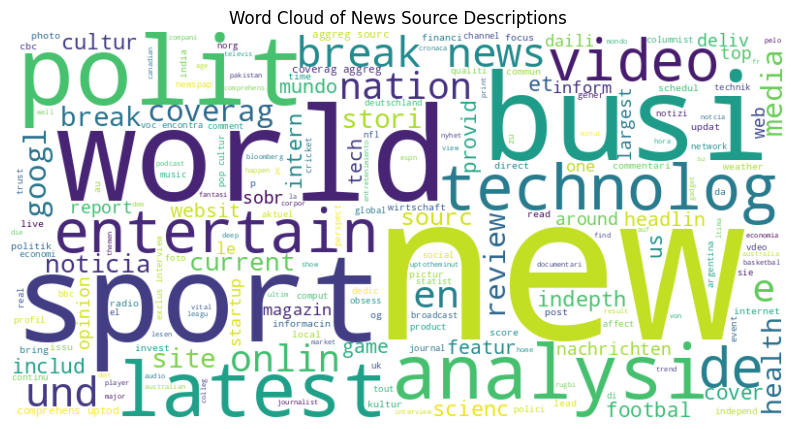

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine preprocessed text from all sources
all_text = ' '.join(sources_df['Preprocessed_Description'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of News Source Descriptions')
plt.show()

The word cloud visualizes the descriptions of news sources, highlighting prevalent themes and focus areas in journalism.

Prominent Words: The prominence of words like "news," "world," "analysis," and "report" underscores their significance in news descriptions, indicating a focus on reporting and analysis.
Categories: Visible terms like "sport," "entertainment," and "business" suggest that news outlets cover a diverse range of topics, catering to various interests and preferences.
Global Distribution: The word cloud's composition reveals clusters of news sources in regions like North America, Europe, and parts of Asia, indicating a concentration of media presence in these areas. This distribution reflects the global dissemination of news and highlights regions with robust journalistic activity.

In [ ]:
sources_df['Country'].unique()

array(['us', 'au', 'no', 'it', 'sa', 'pk', 'gb', 'de', 'br', 'ca', 'es',
       'ar', 'fr', 'in', 'is', 'ru', 'se', 'za', 'ie', 'nl', 'zh'],
      dtype=object)

In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'sources_df' containing news sources data with a 'Country' column
country_counts = sources_df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Num_News_Sources']

In [ ]:
!pip install pycountry

In [ ]:
import pycountry
import plotly.graph_objects as go
# Function to get ISO-3 country code from country name
def get_iso3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None

# Add a new column with ISO-3 country codes
country_counts['ISO-3'] = country_counts['Country'].apply(lambda x: get_iso3(x))

# Check if any country names couldn't be mapped to ISO-3 codes
print(country_counts[country_counts['ISO-3'].isnull()])

# Now you can use 'ISO-3' column for the locations parameter in the choropleth map
fig = go.Figure(data=go.Choropleth(
    locations=country_counts['ISO-3'],
    z=country_counts['Num_News_Sources'],
    text=country_counts['Country'],
    colorscale='RdYlGn',
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title='Number of News Sources'
))

fig.update_layout(
    title_text='Geographic Distribution of News Sources',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    )
)

fig.show()

   Country  Num_News_Sources ISO-3
17      zh                 2  None


The world map visualization showcases the geographic distribution of news sources, offering insights into media coverage across different regions.

Concentration: The visualization illustrates dense clusters of news outlets in regions like North America and Europe, indicating a higher density of media presence in these areas. This concentration suggests a vibrant media landscape and potentially greater access to diverse news sources for audiences.
Sparse Coverage: Conversely, regions like Africa, South America, and some remote areas exhibit sparse coverage, with fewer news outlets represented. This observation highlights disparities in media representation and access to information, signaling potential gaps in news coverage and awareness in these regions.
Global Disparities: By visualizing the distribution of news sources worldwide, the map underscores global disparities in media presence and access to information. The uneven distribution emphasizes the importance of addressing media inequalities and promoting diverse reporting to ensure comprehensive news coverage and global awareness.

# Sentiment Analysis

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Function to classify sentiment using VADER
def classify_sentiment(text):
    # Perform sentiment analysis using VADER
    sentiment_scores = sia.polarity_scores(text)
    # Get the compound score, which represents the overall sentiment
    compound_score = sentiment_scores['compound']

    # Classify sentiment based on the compound score
    if compound_score >= 0.05:
        return 'POSITIVE'
    elif compound_score <= -0.05:
        return 'NEGATIVE'
    else:
        return 'NEUTRAL'

# Apply sentiment classification to each description and store the results in the 'Emotion' column
sources_df['Sentiment'] = sources_df['Preprocessed_Description'].apply(classify_sentiment)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
sources_df.head()

,ID,Name,Description,URL,Category,Language,Country,Preprocessed_Description,Num_Articles,Sentiment
0,abc-news,ABC News,"Your trusted source for breaking news, analysi...",https://abcnews.go.com,general,en,us,trust sourc break news analysi exclus intervie...,1,POSITIVE
1,abc-news-au,ABC News (AU),"Australia's most trusted source of local, nati...",https://www.abc.net.au/news,general,en,au,australia trust sourc local nation world news ...,1,POSITIVE
2,aftenposten,Aftenposten,Norges ledende nettavis med alltid oppdaterte ...,https://www.aftenposten.no,general,no,no,norg ledend nettavi med alltid oppdatert nyhet...,1,NEUTRAL
3,al-jazeera-english,Al Jazeera English,"News, analysis from the Middle East and worldw...",https://www.aljazeera.com,general,en,us,news analysi middl east worldwid multimedia in...,1,NEUTRAL
4,ansa,ANSA.it,"Agenzia ANSA: ultime notizie, foto, video e ap...",https://www.ansa.it,general,it,it,agenzia ansa ultim notizi foto video e approfo...,1,NEUTRAL


In [ ]:
import plotly.express as px

#  Distribution of Sentiment Categories (Bar Chart)
sentiment_counts = sources_df['Sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']
fig = px.bar(sentiment_counts, x='Sentiment', y='Count', color='Sentiment',
             title='Distribution of Sentiment Categories')
fig.show()

The bar chart provides insights into the prevalence of different sentiment categories within the analyzed dataset.

Positive Sentiments: Predominance of positive sentiments suggests an overall optimistic or favorable tone in the news articles. This observation may reflect a tendency towards uplifting or inspiring content, potentially influencing audience perceptions and attitudes.
Negative Sentiments: While less frequent, the presence of negative sentiments indicates the inclusion of critical or unfavorable content in the dataset. Negative sentiments may highlight areas of concern or critique within news reporting, contributing to a balanced representation of diverse viewpoints and perspectives.
Neutral Sentiments: Occurring less frequently than positive sentiments, neutral sentiments imply a balanced or objective stance in news articles. Neutral content may provide factual information without strong emotional bias, facilitating informed decision-making and analysis among audiences.

In [ ]:
# Box Plot of Description Length by Sentiment Category
description_lengths = sources_df['Preprocessed_Description'].apply(lambda x: len(x.split()))
fig = px.box(sources_df, x='Sentiment', y=description_lengths,
             title='Box Plot of Description Length by Sentiment Category')
fig.show()

The box plot visualizes the distribution of description lengths across different sentiment categories, offering insights into how description lengths vary based on sentiment.

Positive Sentiments: Descriptions associated with positive sentiments tend to be shorter, as indicated by the lower median and smaller interquartile range. This observation suggests that positive content may prioritize brevity and conciseness, delivering uplifting or inspiring messages efficiently.
Neutral Sentiments: Neutral descriptions exhibit a slightly higher median length compared to positive sentiments, indicating a more balanced or informative tone. Neutral content may provide comprehensive coverage of topics without strong emotional bias, catering to audiences seeking factual information and analysis.
Negative Sentiments: In contrast, descriptions associated with negative sentiments showcase a broader range of lengths, with some being quite lengthy. This variability suggests that negative content may involve in-depth explanations or critiques, delving into complex issues and controversies in greater detail.

In [ ]:
# Bar Chart of News Categories
description_lengths = sources_df['Preprocessed_Description'].apply(lambda x: len(x.split()))
news_category_counts = sources_df['Category'].value_counts().reset_index()
news_category_counts.columns = ['Category', 'Count']
fig = px.bar(news_category_counts, x='Category', y='Count', color='Category',
             title='Bar Chart of News Categories')
fig.show()

The bar chart visualizes the distribution of news articles across different categories, shedding light on the relative importance of various news topics.

General News: The dominance of general news articles in the dataset suggests a broad focus on current events and happenings worldwide. General news may encompass a wide range of topics, catering to diverse audience interests and preferences.
Specific Fields: Other categories like business, technology, sports, entertainment, science, and health exhibit fewer instances compared to general news. These specialized categories cater to niche interests and provide in-depth coverage of specific topics, offering audiences comprehensive insights into specialized areas of knowledge.

In [ ]:
country_counts = sources_df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']
fig = px.bar(country_counts, x='Country', y='Count', color='Country',
             title='Country-wise Distribution of News Sources')
fig.show()

The bar chart illustrates the prevalence of news sources across different countries, providing insights into the global distribution of media presence.

United States (US): The dominance of US-based news sources in the dataset is evident, with a significantly higher number of outlets represented. This observation reflects the United States' prominent role in global media production and dissemination, with a robust and diverse media landscape encompassing various news organizations and outlets.
Great Britain (GB), India (IN), and Germany (DE): These countries follow the US in terms of the number of news sources but have fewer outlets compared to the US. While not as prevalent as the US, these countries still contribute significantly to global news production and dissemination, reflecting their established media industries and journalistic traditions.
Other Countries: Countries beyond the US, GB, India, and Germany exhibit minimal representation in the dataset, with shorter bars indicating fewer news sources. This observation underscores the uneven distribution of media presence globally, with certain regions enjoying greater prominence and influence in the global media landscape.

In [ ]:
# Visualization 8: Histogram of Description Lengths
fig = px.histogram(sources_df, x=description_lengths,
                   title='Histogram of Description Lengths')
fig.show()

The histogram visualizes the distribution of description lengths in the dataset, offering insights into the variability and characteristics of description length distribution.

Distribution: The histogram's shape indicates a right-skewed distribution of description lengths, with a majority of descriptions being shorter in length. The peak around 15-20 units suggests that most descriptions fall within this range, indicating a common length for news article summaries.
Skewness: The positive skewness of the distribution implies that the data is skewed towards shorter description lengths, with a longer tail on the right indicating a smaller number of longer descriptions. This skewness affects the mean and median, with the mean description length likely pulled towards the longer descriptions.
Kurtosis: The leptokurtic behavior of the histogram indicates heavier tails than a normal distribution, suggesting more extreme values in both shorter and longer description lengths. This observation highlights the variability and diversity in description lengths within the dataset, with some descriptions being significantly shorter or longer than others.
Impact on Analysis: Understanding the distribution, skewness, and kurtosis of description lengths is crucial for accurate data interpretation and analysis. Skewed data distributions may necessitate adjustments in statistical methods and techniques to account for the non-normality of the data, ensuring robust and reliable analysis results.

In [ ]:
# Ensure sentiment analysis has been performed and results are stored in 'Emotion' column

# Group by 'Country' and 'Emotion' columns and count the occurrences
sentiment_country_counts = sources_df.groupby(['Country', 'Sentiment']).size().reset_index(name='Count')

# Create the bar chart
fig = px.bar(sentiment_country_counts, x='Country', y='Count', color='Sentiment',
             title='Bar Chart of Sentiment Categories by Country')
fig.show()

In [ ]:
from wordcloud import WordCloud

# Generate word clouds for each sentiment category
positive_text = ' '.join(sources_df[sources_df['Sentiment'] == 'POSITIVE']['Preprocessed_Description'])
negative_text = ' '.join(sources_df[sources_df['Sentiment'] == 'NEGATIVE']['Preprocessed_Description'])
neutral_text = ' '.join(sources_df[sources_df['Sentiment'] == 'NEUTRAL']['Preprocessed_Description'])

# Create word clouds
positive_cloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_cloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
neutral_cloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

# Plot word clouds as images using Plotly
fig = px.imshow(positive_cloud.to_array(), title='Word Cloud for Positive Sentiment')
fig.show()

fig = px.imshow(negative_cloud.to_array(), title='Word Cloud for Negative Sentiment')
fig.show()

fig = px.imshow(neutral_cloud.to_array(), title='Word Cloud for Neutral Sentiment')
fig.show()

Word Cloud for Positive Sentiment:
This word cloud visually represents the most common words associated with positive news articles or descriptions. Prominent terms like "world," "news," "analysis," and "report" underscore positive content themes. The language patterns emphasize informative reporting, global events, and analysis, aligning with the optimistic sentiment.

Word Cloud for Negative Sentiment:
The word cloud for negative sentiment highlights common words like "news," "business," "entertainment," and "world." These terms suggest that negative news often covers topics related to business, entertainment, and global events. The language patterns reflect discontent, criticism, or concern, providing insights into the themes associated with negative sentiment.

Word Cloud for Neutral Sentiment:
This word cloud visually represents the most common words associated with neutral news articles or descriptions. Prominent terms include "news," "technology," "business," and "world," indicating factual reporting without a strong emotional tone. The absence of strongly positive or negative words suggests a balanced tone, offering objective information without bias.

Common Words Analysis:
Analyzing common words across all three sentiments reveals shared terms like "news," "world," and "analysis." These terms are not outliers but integral to standard news reporting vocabulary. Understanding their presence in the context of news content is crucial for accurate interpretation. These words align with the dataset's overall content and don't stand out as anomalies.

# Emotion Analysis

In [ ]:
from transformers import pipeline

# Load pretrained EmoRoBERTa model for emotion classification
emotion_classifier_roberta = pipeline("text-classification", model="arpanghoshal/EmoRoBERTa")

# Function to classify emotion using EmoRoBERTa model
def classify_emotion_roberta(text):
    result = emotion_classifier_roberta(text)[0]
    emotion_label = result['label']
    return emotion_label

# Apply emotion classification using EmoRoBERTa model
sources_df['EmoRoBERTa_Emotion'] = sources_df['Description'].apply(classify_emotion_roberta)

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [ ]:
sources_df['EmoRoBERTa_Emotion'].unique()

array(['neutral', 'approval', 'curiosity', 'amusement'], dtype=object)

In [ ]:
import pandas as pd

# Assuming your DataFrame is named sources_df and it contains the 'Emotion' column
emotion_counts = sources_df['EmoRoBERTa_Emotion'].value_counts()

# Now you can create the bar plot
fig = px.bar(x=emotion_counts.index, y=emotion_counts.values, labels={'x': 'EmoRoBERTa_Emotion', 'y': 'Count'}, title='Distribution of Emotions')
fig.show()


In [ ]:
sources_df.head()

,ID,Name,Description,URL,Category,Language,Country,Preprocessed_Description,Num_Articles,Sentiment,EmoRoBERTa_Emotion
0,abc-news,ABC News,"Your trusted source for breaking news, analysi...",https://abcnews.go.com,general,en,us,trust sourc break news analysi exclus intervie...,1,POSITIVE,neutral
1,abc-news-au,ABC News (AU),"Australia's most trusted source of local, nati...",https://www.abc.net.au/news,general,en,au,australia trust sourc local nation world news ...,1,POSITIVE,approval
2,aftenposten,Aftenposten,Norges ledende nettavis med alltid oppdaterte ...,https://www.aftenposten.no,general,no,no,norg ledend nettavi med alltid oppdatert nyhet...,1,NEUTRAL,neutral
3,al-jazeera-english,Al Jazeera English,"News, analysis from the Middle East and worldw...",https://www.aljazeera.com,general,en,us,news analysi middl east worldwid multimedia in...,1,NEUTRAL,neutral
4,ansa,ANSA.it,"Agenzia ANSA: ultime notizie, foto, video e ap...",https://www.ansa.it,general,it,it,agenzia ansa ultim notizi foto video e approfo...,1,NEUTRAL,neutral


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Selecting features for PCA
features = ['ID', 'Category', 'Language', 'Country', 'Num_Articles']

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(sources_df[features])

# Perform PCA
pca = PCA(n_components=2)  # We'll reduce the features to 2 dimensions for visualization
pca_result = pca.fit_transform(scaled_features)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

# Concatenate the PCA results with the original DataFrame
sources_pca_df = pd.concat([sources_df, pca_df], axis=1)

# Display the DataFrame with PCA results
print(sources_pca_df.head())

ValueError: could not convert string to float: 'abc-news'

## Interpretation:
The presence of non-numeric values in the dataset demonstrates that the data may not be properly formatted or cleaned, which is essential for accurate analysis, especially in tasks involving text data. News articles typically consist of textual content, which requires specialized techniques such as NLP for analysis. `PCA, designed for numerical data`, may not effectively capture the semantics and contextual information present in text. Given that the `project aims to perform sentiment analysis and categorization of news articles`, it's essential to use techniques and algorithms specifically designed for text data to achieve meaningful insights and accurate predictions.

Instead of PCA, consider utilizing NLP techniques such as tokenization, word embedding (e.g., Word2Vec, GloVe), and sentiment analysis models `(e.g., VADER, TextBlob)` for preprocessing and analyzing the textual content of news articles. Additionally, `machine learning algorithms` such as decision trees, support vector machines (SVM), or `deep learning models` like recurrent neural networks (RNNs) and transformers (e.g., BERT) are more suitable for tasks involving text classification and sentiment analysis.

In [ ]:
sources_df['EmoRoBERTa_Emotion'].unique()

array(['neutral', 'approval', 'curiosity', 'amusement'], dtype=object)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
import pandas as pd

# Define the mapping for EmoRoBERTa_Emotion
emo_mapping = {
    'neutral': 0,
    'approval': 1,
    'curiosity': 2,
    'amusement': 3
}

# Select the feature for clustering (Emotion or EmoRoBERTa_Emotion)
feature = 'EmoRoBERTa_Emotion'  # Change to 'EmoRoBERTa_Emotion' if needed

# Map the EmoRoBERTa_Emotion to numerical values
sources_df['EmoRoBERTa_Emotion_Num'] = sources_df[feature].map(emo_mapping)

# Select features for clustering
X = sources_df[['EmoRoBERTa_Emotion_Num']]

# Initialize KMeans clustering
n_clusters = 4  # Number of clusters, since there are 4 unique emotions
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit KMeans clustering model
kmeans.fit(X)

# Predict cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the dataset
sources_df['Cluster'] = cluster_labels

# Evaluate clustering performance (optional)
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Define a mapping dictionary to map cluster labels to emotions
cluster_mapping = {
    0: 'NEUTRAL',
    1: 'APPROVAL',
    2: 'CURIOSITY',
    3: 'AMUSEMENT'
}

# Map cluster labels to emotions in the DataFrame
sources_df['Cluster'] = sources_df['Cluster'].map(cluster_mapping)

# Display the distribution of clusters with corresponding emotions
print("Cluster Distribution with Emotions:")
print(sources_df['Cluster'].value_counts())

Silhouette Score: 0.984375
Cluster Distribution with Emotions:
Cluster
NEUTRAL      103
APPROVAL      23
AMUSEMENT      1
CURIOSITY      1
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
import plotly.express as px

# Create a scatter plot
fig = px.scatter(sources_df, x='EmoRoBERTa_Emotion', y='Cluster', color='Cluster',
                 title='Cluster Visualization based on Emotion',
                 labels={'Emotion': 'Emotion', 'Cluster': 'Cluster'})

# Show the plot
fig.show()

In [ ]:
sources_df.head()

,ID,Name,Description,URL,Category,Language,Country,Preprocessed_Description,Num_Articles,Sentiment,EmoRoBERTa_Emotion,EmoRoBERTa_Emotion_Num,Cluster
0,abc-news,ABC News,"Your trusted source for breaking news, analysi...",https://abcnews.go.com,general,en,us,trust sourc break news analysi exclus intervie...,1,POSITIVE,neutral,0,NEUTRAL
1,abc-news-au,ABC News (AU),"Australia's most trusted source of local, nati...",https://www.abc.net.au/news,general,en,au,australia trust sourc local nation world news ...,1,POSITIVE,approval,1,APPROVAL
2,aftenposten,Aftenposten,Norges ledende nettavis med alltid oppdaterte ...,https://www.aftenposten.no,general,no,no,norg ledend nettavi med alltid oppdatert nyhet...,1,NEUTRAL,neutral,0,NEUTRAL
3,al-jazeera-english,Al Jazeera English,"News, analysis from the Middle East and worldw...",https://www.aljazeera.com,general,en,us,news analysi middl east worldwid multimedia in...,1,NEUTRAL,neutral,0,NEUTRAL
4,ansa,ANSA.it,"Agenzia ANSA: ultime notizie, foto, video e ap...",https://www.ansa.it,general,it,it,agenzia ansa ultim notizi foto video e approfo...,1,NEUTRAL,neutral,0,NEUTRAL


# Emotion Distribution:
The majority of the data falls under the “neutral” emotion category, with over 100 counts.
“Approval” has a significantly smaller count, around 30.
Both “curiosity” and “amusement” have minimal to no counts.
Emotional Diversity:
The dominance of neutral emotions suggests that the analyzed dataset contains a substantial amount of content without strong emotional tone.
The limited presence of approval, curiosity, and amusement indicates less diversity in emotional expressions.
The data points are grouped into distinct clusters based on their emotional content.
Each color represents a different cluster.
The presence of separate clusters suggests that different emotions exhibit unique patterns.
The distance between clusters indicates dissimilarity in emotional expression.
# Interpretation:
The position of each data point along the Emotion axis reflects its emotional category.
The Cluster axis likely represents some form of similarity or grouping.
In summary, this visualization helps us understand how emotions are distributed and grouped within the dataset.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Assuming you have a DataFrame called 'data' containing the preprocessed text and labels
X = sources_df['Preprocessed_Description']
y = sources_df['Sentiment']  # Assuming 'Sentiment' indicates whether the article is genuine or fake

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Evaluate the classifier
y_pred = nb_classifier.predict(X_test_tfidf)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.00      0.00      0.00         2
     NEUTRAL       0.79      0.79      0.79        19
    POSITIVE       0.43      0.60      0.50         5

    accuracy                           0.69        26
   macro avg       0.41      0.46      0.43        26
weighted avg       0.66      0.69      0.67        26



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Define a pipeline with TF-IDF vectorizer and Multinomial Naive Bayes classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

# Define a grid of hyperparameters to search over
param_grid = {
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'tfidf__min_df': [1, 2, 5],
    'nb__alpha': [0.1, 0.5, 1.0]
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model with best hyperparameters
y_pred = grid_search.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'nb__alpha': 0.5, 'tfidf__max_df': 0.5, 'tfidf__min_df': 2}
Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.00      0.00      0.00         2
     NEUTRAL       0.81      0.68      0.74        19
    POSITIVE       0.30      0.60      0.40         5

    accuracy                           0.62        26
   macro avg       0.37      0.43      0.38        26
weighted avg       0.65      0.62      0.62        26



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# Now let's analyze the news data related to technology

In [ ]:
import pandas as pd
import requests

# Define query parameters
query_params = {
    'apiKey': API_KEY,
    'q': 'technology',  # Keywords related to technology
    'from': '2024-03-08T00:00:00',  # Start retrieving articles from March 5, 2024
    'to': '2024-03-05T23:59:59',    # Adjusted: End date within the allowed range
    'language': 'en',  # Language code (e.g., 'en' for English)
    'sortBy': 'publishedAt',  # Sort by newest articles first
    'pageSize': 100  # Number of articles per page (maximum: 100)
}

# Make a request to the /everything endpoint
response = requests.get('https://newsapi.org/v2/everything', params=query_params)

# Check if the request was successful
if response.status_code == 200:
    # Process the response data
    data = response.json()
    articles = data['articles']

    # Extract relevant information from articles
    article_titles = [article['title'] for article in articles]
    article_descriptions = [article['description'] for article in articles]

    # Create DataFrame
    df_technology = pd.DataFrame({'Title': article_titles, 'Description': article_descriptions})

    # Display the first few rows of the DataFrame
    print(df_technology.head())
else:
    print('Error:', response.status_code)
    print(response.json())  # Print error message if request was not successful

                                               Title  \
0  Mike Tyson and Jake Paul Fight is Streaming on...   
1  Three Big Telecom Takeaways From Mobile World ...   
2  Sam Altman Returns To OpenAI Board Months Afte...   
3  Sam Altman Returns To OpenAI Board Months Afte...   
4  Cybeats Announces First Tranche Closing for Gr...   

                                         Description  
0  Mike Tyson and Jake Paul Fight is Streaming on...  
1  Industry analyst Will Townsend came away from ...  
2  CEO Sam Altman will return to the board of Ope...  
3  CEO Sam Altman will return to the board of Ope...  
4  (marketscreener.com) Cybeats Technologies Corp...  


# NER - Named Entity Recognition

In [ ]:
import spacy
import pandas as pd

# Load spaCy's English language model
nlp = spacy.load("en_core_web_sm")

# Function to perform Named Entity Recognition (NER) on text
def extract_entities(text):
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents]  # Extract only the named entities
    return entities

# Drop rows with missing descriptions
df_technology = df_technology.dropna(subset=['Description']).copy()  # Ensure we're working on a copy

# Apply NER to the 'Title' column
df_technology.loc[:, 'Title_Entities'] = df_technology['Title'].apply(lambda x: extract_entities(x))

# Apply NER to the 'Description' column
df_technology.loc[:, 'Description_Entities'] = df_technology['Description'].apply(lambda x: extract_entities(x))

# Display the DataFrame with extracted entities in separate columns
df_technology.head()

,Title,Description,Title_Entities,Description_Entities
0,Mike Tyson and Jake Paul Fight is Streaming on...,Mike Tyson and Jake Paul Fight is Streaming on...,"[Mike Tyson, Jake Paul Fight, Netflix]","[Mike Tyson, Jake Paul Fight, the century, Mik..."
1,Three Big Telecom Takeaways From Mobile World ...,Industry analyst Will Townsend came away from ...,"[Three, 2024]","[Will Townsend, MWC Barcelona, 2024, RAN, LEO,..."
2,Sam Altman Returns To OpenAI Board Months Afte...,CEO Sam Altman will return to the board of Ope...,"[Sam Altman, Returns To]","[Sam Altman, OpenAI, Friday, just months, Altman]"
3,Sam Altman Returns To OpenAI Board Months Afte...,CEO Sam Altman will return to the board of Ope...,"[Sam Altman, Returns To, Shakeup]","[Sam Altman, OpenAI, Friday, just months]"
4,Cybeats Announces First Tranche Closing for Gr...,(marketscreener.com) Cybeats Technologies Corp...,[$1.1 Million],"[Cybeats Technologies Corp., February 19, 2024..."


## Sentiment Analysis and Authenticity Classification of Technology News Articles

In [ ]:
from textblob import TextBlob

# Define a function to classify the sentiment of a given text
def classify_sentiment(text):
  blob = TextBlob(text)
  sentiment = blob.sentiment.polarity
  if sentiment > 0:
    return 'positive'
  elif sentiment < 0:
    return 'negative'
  else:
    return 'neutral'

# Apply the sentiment analysis function to the combination of 'Title' and 'Description'
df_technology['Sentiment'] = df_technology['Title'] + ' ' + df_technology['Description']
df_technology['Sentiment'] = df_technology['Sentiment'].apply(classify_sentiment)

# Display the updated DataFrame with the combined sentiment label
df_technology.head()

,Title,Description,Title_Entities,Description_Entities,Sentiment
0,Mike Tyson and Jake Paul Fight is Streaming on...,Mike Tyson and Jake Paul Fight is Streaming on...,"[Mike Tyson, Jake Paul Fight, Netflix]","[Mike Tyson, Jake Paul Fight, the century, Mik...",positive
1,Three Big Telecom Takeaways From Mobile World ...,Industry analyst Will Townsend came away from ...,"[Three, 2024]","[Will Townsend, MWC Barcelona, 2024, RAN, LEO,...",positive
2,Sam Altman Returns To OpenAI Board Months Afte...,CEO Sam Altman will return to the board of Ope...,"[Sam Altman, Returns To]","[Sam Altman, OpenAI, Friday, just months, Altman]",negative
3,Sam Altman Returns To OpenAI Board Months Afte...,CEO Sam Altman will return to the board of Ope...,"[Sam Altman, Returns To, Shakeup]","[Sam Altman, OpenAI, Friday, just months]",negative
4,Cybeats Announces First Tranche Closing for Gr...,(marketscreener.com) Cybeats Technologies Corp...,[$1.1 Million],"[Cybeats Technologies Corp., February 19, 2024...",positive


In [ ]:
df_technology['Sentiment'].value_counts()

Sentiment
positive    65
neutral     20
negative    14
Name: count, dtype: int64

In [ ]:
# Function to classify articles as genuine or potentially fake based on sentiment
def classify_authenticity(sentiment):
    if sentiment == 'positive':
        return 'Genuine'
    elif sentiment == 'negative':
        return 'Potentially Fake'
    else:
        return 'Uncertain'

# Apply the classification function to the predicted sentiment scores
df_technology['Authenticity'] = df_technology['Sentiment'].apply(classify_authenticity)

# Display the DataFrame with predicted authenticity labels
df_technology.head()

,Title,Description,Title_Entities,Description_Entities,Sentiment,Title_Description,Description_Processed,Authenticity
0,Mike Tyson and Jake Paul Fight is Streaming on...,Mike Tyson and Jake Paul Fight is Streaming on...,"[Mike Tyson, Jake Paul Fight, Netflix]","[Mike Tyson, Jake Paul Fight, the century, Mik...",positive,Mike Tyson and Jake Paul Fight is Streaming on...,mike tyson jake paul fight streaming netflix m...,Genuine
1,Three Big Telecom Takeaways From Mobile World ...,Industry analyst Will Townsend came away from ...,"[Three, 2024]","[Will Townsend, MWC Barcelona, 2024, RAN, LEO,...",positive,Three Big Telecom Takeaways From Mobile World ...,big telecom takeaways mobile world congress ba...,Genuine
2,Sam Altman Returns To OpenAI Board Months Afte...,CEO Sam Altman will return to the board of Ope...,"[Sam Altman, Returns To]","[Sam Altman, OpenAI, Friday, just months, Altman]",negative,Sam Altman Returns To OpenAI Board Months Afte...,sam altman returns openai board months crisis ...,Potentially Fake
3,Sam Altman Returns To OpenAI Board Months Afte...,CEO Sam Altman will return to the board of Ope...,"[Sam Altman, Returns To, Shakeup]","[Sam Altman, OpenAI, Friday, just months]",negative,Sam Altman Returns To OpenAI Board Months Afte...,sam altman returns openai board months shakeup...,Potentially Fake
4,Cybeats Announces First Tranche Closing for Gr...,(marketscreener.com) Cybeats Technologies Corp...,[$1.1 Million],"[Cybeats Technologies Corp., February 19, 2024...",positive,Cybeats Announces First Tranche Closing for Gr...,cybeat announce tranche closing gross proceeds...,Genuine


In [ ]:
df_technology['Authenticity'].value_counts()

Authenticity
Genuine             65
Uncertain           20
Potentially Fake    14
Name: count, dtype: int64

In [ ]:
import spacy
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

import spacy
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Load spaCy's English language model
nlp = spacy.load("en_core_web_sm")

# Function to preprocess text
def preprocess_text(text):
    # Apply spaCy NLP pipeline to tokenize and process text
    doc = nlp(text)
    # Lemmatize tokens and remove punctuation and stopwords
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]
    # Return preprocessed text as a string
    return ' '.join(tokens)

# Concatenate titles and descriptions into a single text column
df_technology['Title_Description'] = df_technology['Title'] + ' ' + df_technology['Description']

# Preprocess the concatenated text
df_technology['Description_Processed'] = df_technology['Title_Description'].apply(preprocess_text)

## Fine-tuning the hyperparameters of the Naive Bayes classifier particularly the alpha smoothing parameter for Multinomial Naive Bayes

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Define the parameter grid
param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}

# Initialize Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Perform grid search with cross-validation
grid_search = GridSearchCV(nb_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)

# Extract best parameters
best_alpha = grid_search.best_params_['alpha']
print("Best Alpha:", best_alpha)

Best Alpha: 0.5


## Naive bayes Classification

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Assuming you have a DataFrame called 'df_technology' containing the processed text and sentiment labels
X = df_technology['Description_Processed']  # Assuming 'Description_Processed' contains the processed text
y = df_technology['Sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes classifier with the best alpha value
best_alpha = 0.5
nb_classifier = MultinomialNB(alpha=best_alpha)  # Set the best alpha value
nb_classifier.fit(X_train_tfidf, y_train)

# Evaluate the classifier
y_pred = nb_classifier.predict(X_test_tfidf)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.00      0.00         1
     neutral       1.00      0.17      0.29         6
    positive       0.68      1.00      0.81        13

    accuracy                           0.70        20
   macro avg       0.89      0.39      0.37        20
weighted avg       0.79      0.70      0.61        20



## Decision Tree

In [111]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define features and target variable
X = df_technology['Description_Processed']  # Processed description text as features
y = df_technology['Sentiment']  # Sentiment as target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train_vect, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_vect)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    negative       0.20      1.00      0.33         1
     neutral       0.67      0.33      0.44         6
    positive       0.83      0.77      0.80        13

    accuracy                           0.65        20
   macro avg       0.57      0.70      0.53        20
weighted avg       0.75      0.65      0.67        20


Confusion Matrix:
[[ 1  0  0]
 [ 2  2  2]
 [ 2  1 10]]


## Interpretation:

* The model performs relatively well in identifying positive sentiments, with high precision and recall.
* However, it struggles with negative sentiments, showing low precision and moderate recall.
* Neutral sentiments are also challenging for the model, as indicated by moderate precision and recall.
* The overall accuracy of the model is 65%, suggesting that there is room for improvement, particularly in correctly identifying negative and neutral sentiments.